In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('WineQT.csv')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
df.shape

(1143, 13)

In [7]:
df.info
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
df['quality'].count

<bound method Series.count of 0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64>

In [10]:
df['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  6.7,  5.6,  8.5,  7.6,  6.9,  6.3,
        7.1,  8.3,  5.2,  8.1,  8.8,  7.5,  4.6,  7.7,  6.6,  8.6, 10.2,
        7. ,  7.2,  8. ,  6.8,  6.2,  9.3,  5. ,  8.4, 10.1,  9.4,  8.2,
        5.8,  9.2,  8.9,  6.4, 11.5,  9.6, 12.8,  9.7,  8.7, 12. , 15. ,
       10.8, 11.1, 10. , 12.5, 10.3, 11.4,  9.9, 11.6, 10.4, 13.3, 10.6,
        9. ,  9.8, 13.4, 11.9, 10.9, 13.8,  9.1, 13.5,  6.1, 10.5, 12.6,
       13.7,  9.5, 12.2, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 10.7, 12.9,
       14.3, 12.4, 15.5, 12.7, 13.2, 15.9,  5.1, 11.8,  4.9,  5.9, 11.7,
        5.4,  5.7,  6. ])

<AxesSubplot:xlabel='quality', ylabel='count'>

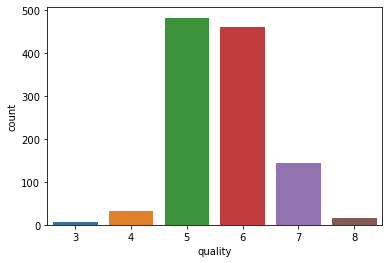

In [11]:
sns.countplot(x='quality',data=df)

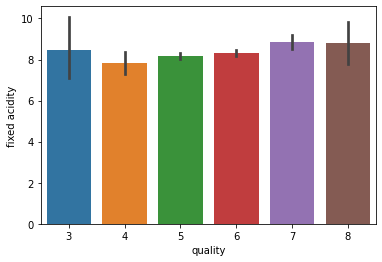

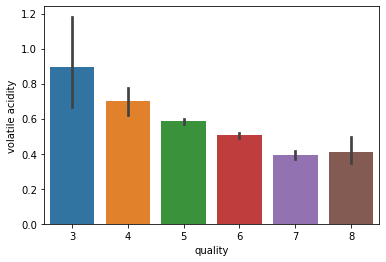

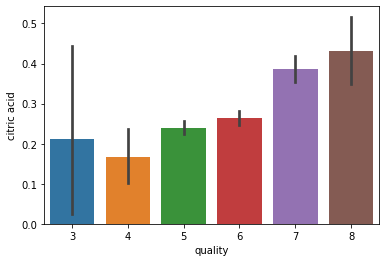

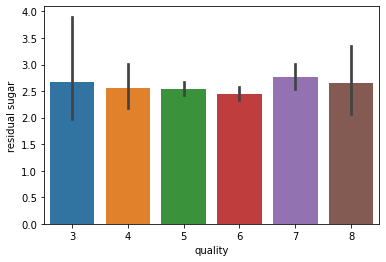

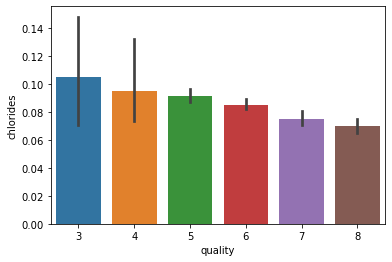

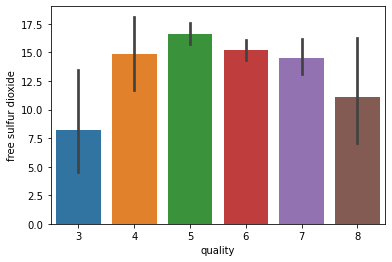

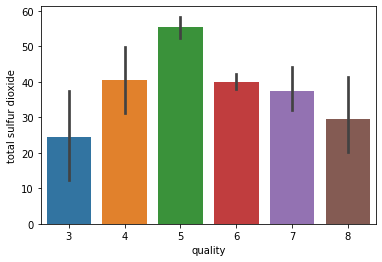

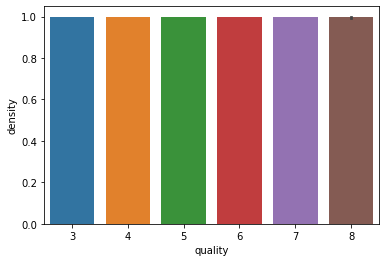

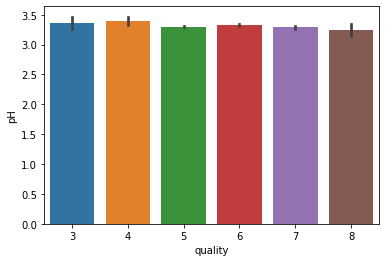

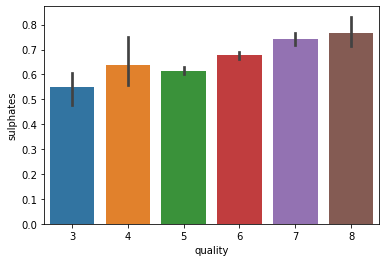

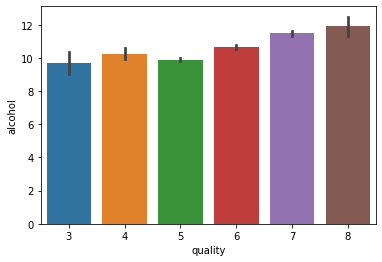

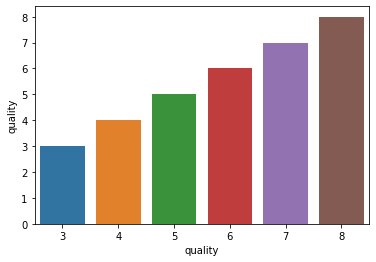

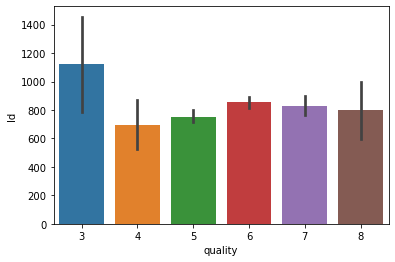

In [12]:
df1 = df.select_dtypes([np.int, np.float])

for i,col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality', y =col, data=df1)

In [13]:
import matplotlib.pyplot as plt

IndexError: index 12 is out of bounds for axis 0 with size 12

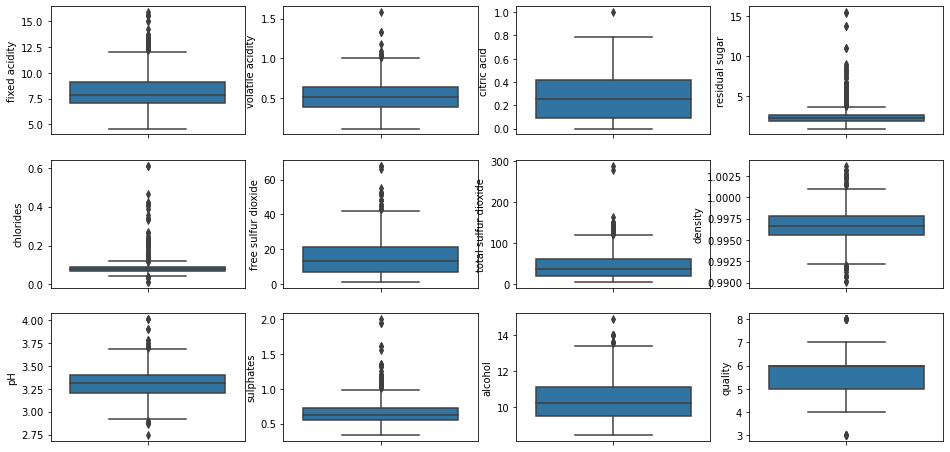

In [14]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,8))
index= 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

In [ ]:
sb.Implot(x="volatile acidity",y="quality",data=df)

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,8))
index= 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(y=col, data=df, ax=ax[index])
    index += 1

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [26]:
def preprocess_inputs(df):
    df = df.copy()
    
    y = df['quality']
    X = df.drop('quality',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)
    
    return X_train, X_test, y_train, y_test

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [24]:
grid_search_cv.best_estimator_
grid_search_cv.score(X_test, y_test)

0.5685131195335277

In [25]:
rnd_clf = RandomForestClassifier()
grid_params_1 = {'max_depth' : [18], 'n_estimators' : [127], 'criterion':['entropy']}
grid = GridSearchCV(estimator=rnd_clf, param_grid=grid_params_1, n_jobs=-1, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [18],
                         'n_estimators': [127]})

In [26]:
grid.best_estimator_
grid.score(X_test, y_test)

0.6326530612244898

In [1]:
{
    '           Linear SVM':    LinearSVC(),
    '        Decision Tree': DecisionTreeClassifier(),
    '        Random Forest': RandomForestClassifier(),
    ' KNeighborsClassifier': KNeighborsClassifier()
}

for name, model in models.items():
    model = model.fit(X_train, y_train)
    print(name + "trained")

NameError: name 'LinearSVC' is not defined